# Step 2 in the Feature Selection Pipeline: Reduce the Preprocessed Random Forest Feature Set using PCA
In this experiment, Principal Components Analysis will be used to identify important features in order to further reduce the feature set from 890 to a lower bound with some value of f1-score and accuracy. The desired results would be to find a minimal set such that the accuracy of a random forest will be $~0.99$ and the f1-score $~0.8$

In [25]:
import os
import pandas as pd
import time
from tqdm import tqdm
import glob
import numpy as np

from utils.input_pipeline import load_data_h5
from sklearn.preprocessing import Imputer, Normalizer

feature_path = "results/full_kinase_set/step5_features.csv"

#TODO: WRITE-UP the results

In [26]:
with open(feature_path, "r") as input_file:
    feature_list = []
    for line in input_file:
        line = line.strip('\n')
        feature_list.append(line)
        
print(len(feature_list))

8


In [27]:
X_input,y_input = load_data_h5("data/all_kinase/with_pocket/full_data.h5",features_list = feature_list)

KeyError: "Unable to open object (Object 'label' doesn't exist)"

In [9]:
imputer = Imputer()
normalizer = Normalizer()
X_input = normalizer.fit_transform(imputer.fit_transform(X_input))

In [10]:
print (X_input.shape, y_input.shape)

(361786, 1840) (361786, 1)


In [11]:
from sklearn.decomposition import IncrementalPCA
n_components = 20
ipca = IncrementalPCA(n_components=n_components, batch_size=500)
X_ipca = ipca.fit_transform(X_input)

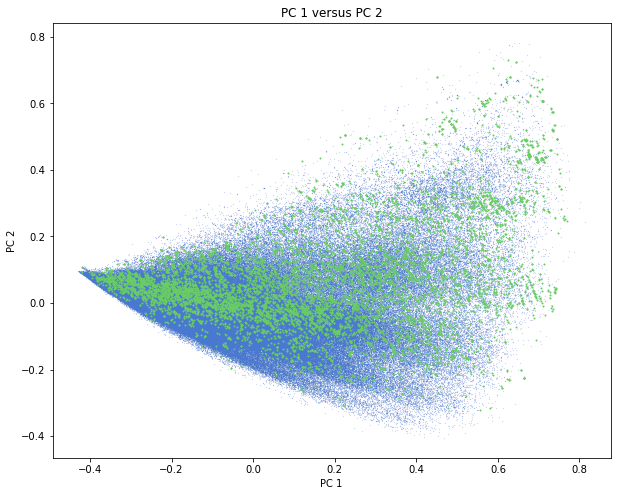

In [13]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-muted")

plt.figure(figsize=[10,8])
plt.scatter(X_ipca[:,0][y_input[:,0]== 0],X_ipca[:,1][y_input[:,0] == 0],s=1e-2)
plt.scatter(X_ipca[:,0][y_input[:,0]== 1],X_ipca[:,1][y_input[:,0] == 1],s=1)
plt.title("PC 1 versus PC 2: Preprocessed Features")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.savefig("results/pc1_vs_pc2_preprocessed.png")
plt.show()

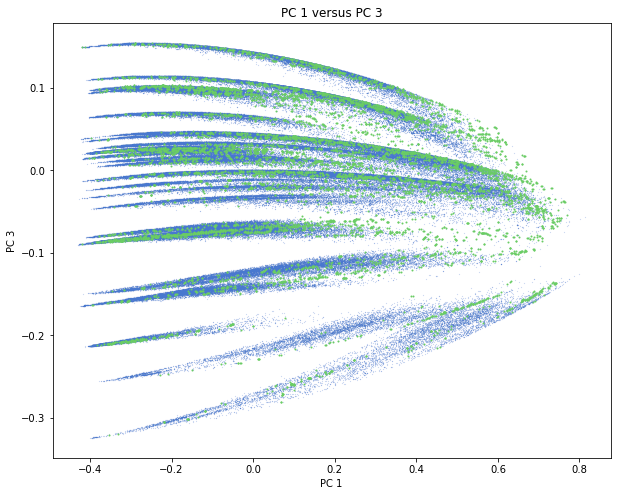

In [14]:
plt.figure(figsize=[10,8])
plt.scatter(X_ipca[:,0][y_input[:,0]== 0],X_ipca[:,2][y_input[:,0] == 0],s=1e-2)
plt.scatter(X_ipca[:,0][y_input[:,0]== 1],X_ipca[:,2][y_input[:,0] == 1],s=1)
plt.title("PC 1 versus PC 3: Preprocessed Features")
plt.xlabel("PC 1")
plt.ylabel("PC 3")
plt.savefig("results/pc1_vs_pc3_preprocessed.png")
plt.show()

# MAKE AN ALGORITHM TO CHOOSE OPTIMAL N_COMPONENTS

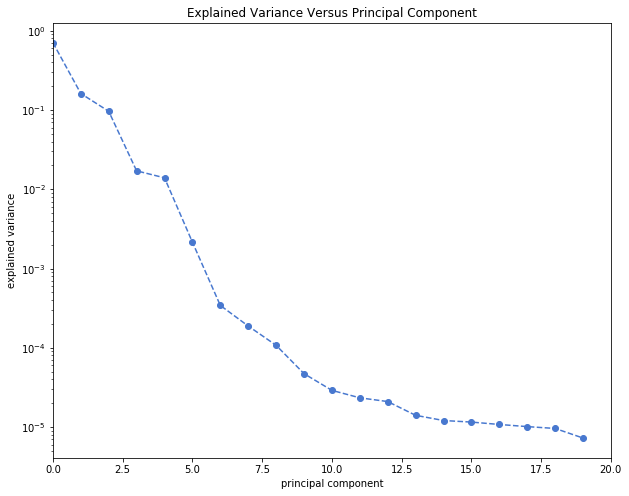

In [15]:
plt.figure(figsize = (10,8));
plt.semilogy(ipca.explained_variance_ratio_, '--o');
plt.title("Explained Variance Versus Principal Components: Preprocessed Features")
plt.xlabel('principal component');
plt.ylabel('explained variance');
plt.xlim([0, n_components]);
plt.savefig("results/explained_variance_vs_pc.png")
plt.show()

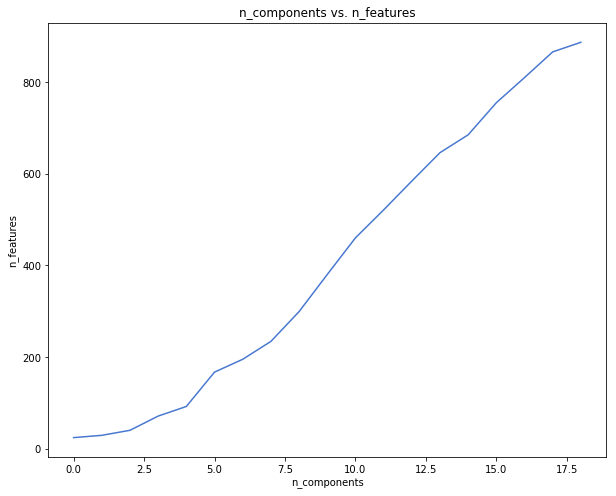

In [20]:
# SELECT THE SMALLEST SET OF NEEDED COMPONENTS (COMPUTE DERIVATIVE AND FIND point near 0)
# THEN using those components, compute the mean values for each component and find the set of features
# that are above the threshold for each. FINALLY, take the intersection? of these sets and use as the new reduced
# feature set

from scipy.stats import scoreatpercentile, percentileofscore
from sklearn.preprocessing import scale

num_its = n_components
reduction_list = []
keep_feature_list = []
for i in range(1,num_its):
    upper_limit = i
    a = ipca.components_[0:i,:]


    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i,j] > np.mean(a[i,:]):
                a[i,j] = 1
            else:
                a[i,j] = 0
    
    keep_idxs = []
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            if a[i,j] == 1:
                keep_idxs.append(j)
                
    after_pca_features = np.asarray(feature_list)[keep_idxs]
    reduction_list.append(after_pca_features.shape)
    keep_feature_list.append(after_pca_features)
    
plt.clf()
plt.figure(figsize=[10,8])
plt.title("n_components vs. n_features")
plt.ylabel("n_features")
plt.xlabel("n_components")
plt.plot(reduction_list)
plt.show()

In [ ]:
support = forest_model.named_steps['selection_forest'].feature_importances_


In [ ]:
plt.clf()
plt.figure(figsize=[10,8])
plt.plot(np.sort(support)[::-1])
plt.title("Random Forest Feature Support (sorted)")
plt.ylabel("feature importance")
plt.savefig("feature_importance_curve_full_set.png")
plt.show()

In [21]:
after_pca_features = np.asarray(keep_feature_list[12])
print(after_pca_features.shape)
features_to_keep = pd.DataFrame(after_pca_features.tolist())
features_to_keep.to_csv("preprocessed_features_pca_revised.csv",index=False,header=False)

(460,)
